In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import jaccard_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df = df[df['caa'] != 4]
df['caa'].value_counts()

caa
0    175
1     65
2     38
3     20
Name: count, dtype: int64

In [4]:
X = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']]
X[0: 5]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [5]:
Y = df['output']
Y[0: 5]

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [6]:
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X.astype(float))
X_scaled[0: 5]

array([[ 0.94171851,  0.68938199,  1.97656958,  0.76075684, -0.26842552,
         2.40265005, -0.99591602,  0.0232535 , -0.7       ,  1.0709197 ,
        -2.26421593, -0.72013413, -2.14045037],
       [-1.9422479 ,  0.68938199,  1.00779041, -0.08960152,  0.05972209,
        -0.4162071 ,  0.90653894,  1.6357888 , -0.7       ,  2.10343758,
        -2.26421593, -0.72013413, -0.50910968],
       [-1.49856076, -1.4505746 ,  0.03901124, -0.08960152, -0.82820673,
        -0.4162071 , -0.99591602,  0.98205827, -0.7       ,  0.29653128,
         0.97970882, -0.72013413, -0.50910968],
       [ 0.16526602,  0.68938199,  0.03901124, -0.65650709, -0.21051712,
        -0.4162071 ,  0.90653894,  1.24355048, -0.7       , -0.21972766,
         0.97970882, -0.72013413, -0.50910968],
       [ 0.2761878 , -1.4505746 , -0.92976793, -0.65650709,  2.06721332,
        -0.4162071 ,  0.90653894,  0.58981996,  1.42857143, -0.39181397,
         0.97970882, -0.72013413, -0.50910968]])

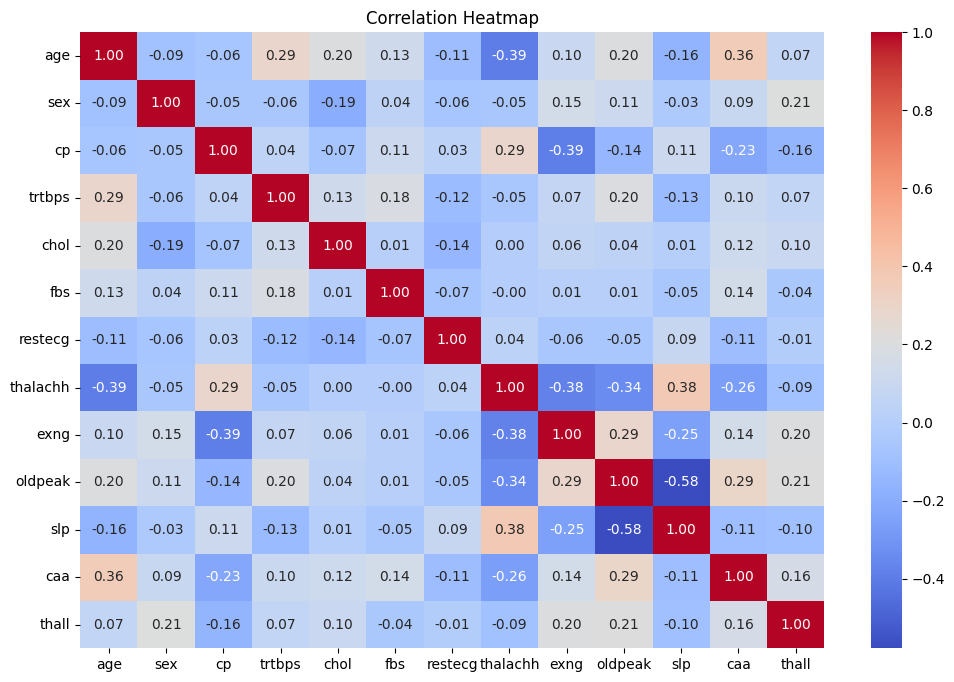

In [7]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
plt.figure(figsize=(12, 8))
correlation_matrix = X_scaled_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [8]:
X_train_scaled, X_test_scaled, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train_scaled.shape,  Y_train.shape)
print ('Test set:', X_test_scaled.shape,  Y_test.shape)

Train set: (238, 13) (238,)
Test set: (60, 13) (60,)


In [10]:
svm_model = SVC()
svm_model.fit(X_train_scaled, Y_train)

SVC()

In [11]:
Y_hat = svm_model.predict(X_test_scaled)
Y_hat

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [12]:
jaccard_score(Y_test, Y_hat,pos_label=0)

0.5666666666666667

In [13]:
print(classification_report(Y_test, Y_hat))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72        24
           1       0.81      0.83      0.82        36

    accuracy                           0.78        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.78      0.78      0.78        60



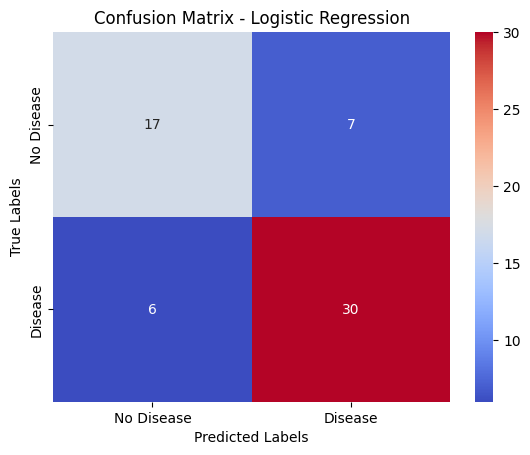

In [14]:
lr_cm = confusion_matrix(Y_test, Y_hat)
sns.heatmap(lr_cm, annot=True, cmap='coolwarm', fmt=".0f", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()